In [134]:
#!pip install "holoviews[recommended]"
#!pip uninstall mpl-chord-diagram -y


In [135]:
import pandas as pd
import numpy as np
import os
from ast import literal_eval
import itertools
import networkx as nx
import math
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_chord_diagram import chord_diagram

### Read files

In [136]:
final_artist_genres_df= pd.read_csv(os.path.join('data', 'generated', '02_artist_genres.csv'), 
                                    index_col=0, converters={"genres": literal_eval})
final_artist_genres_df= final_artist_genres_df.set_index('id')
final_artist_genres_df

,name,n_genres,genres
id,,,
1uUuCEXmWpKN2YLl5xSoT2,$hirak,3,"[rap, pop, hip-hop]"
5wV3FoaNbDB6X9INuQvs1K,Bilal Wahib,1,[pop]
0Jsk5iYMr5aNjHury7blm1,Boef,1,[hip-hop]
5GvMLzUp6tMBpaCbr903RN,Broederliefde,3,"[rap, pop, hip-hop]"
1PyToLP6F2rzV0ZSR71lgl,Bryan Mg,3,"[rap, pop, hip-hop]"
...,...,...,...
2c5ddMGUqnnYFr9mgddCVM,Lazy Lizzard Gang,2,"[german, rap]"
7d86ERlvO5UG44j7Va0Y0C,Pamungkas,1,[singer-songwriter]
0Jzbm3ifxDNLxxS8M4BS51,Massari,1,[pop]


In [137]:
final_artist_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11520 entries, 1uUuCEXmWpKN2YLl5xSoT2 to 7jXoGtR69J2iYCefc58MZX
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      11520 non-null  object
 1   n_genres  11520 non-null  int64 
 2   genres    11520 non-null  object
dtypes: int64(1), object(2)
memory usage: 360.0+ KB


In [138]:
collab_w_codes_df= pd.read_csv(os.path.join('data', 'generated', '02_collaborative_tracks_w_artists_codes.csv'), index_col=0)
collab_w_codes_df

,Artist,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,Artist_7,Artist_8,Artist_9,Artist_10,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_artists
0,no_code,7HSeegdmjLYRJpkOYIaZIW,4SgKWjM7cJDCh2aY9H4HZf,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,0.0,-5.511,0.0,0.0532,0.22900,0.000000,0.0693,0.863,180.143,2
1,1uUuCEXmWpKN2YLl5xSoT2,5wV3FoaNbDB6X9INuQvs1K,0Jsk5iYMr5aNjHury7blm1,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,0.0,-7.339,0.0,0.0412,0.00095,0.000006,0.3650,0.739,155.889,3
2,1uUuCEXmWpKN2YLl5xSoT2,5GvMLzUp6tMBpaCbr903RN,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,11.0,-7.194,0.0,0.2960,0.29100,0.000000,0.3100,0.601,91.709,2
3,1uUuCEXmWpKN2YLl5xSoT2,1PyToLP6F2rzV0ZSR71lgl,5qeFPM2PZUCzcpkY4e4RC8,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,6.0,-5.208,0.0,0.1180,0.06100,0.000003,0.1180,0.474,171.804,3
4,1uUuCEXmWpKN2YLl5xSoT2,no_code,0Jsk5iYMr5aNjHury7blm1,5wV3FoaNbDB6X9INuQvs1K,5eir5zFJpES4j7gsymbVyl,no_code,no_code,no_code,no_code,no_code,...,2.0,-7.416,0.0,0.2340,0.07750,0.000000,0.0918,0.652,129.997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28532,2Sm4rGKWBnOQhdqDy4JJh0,5cMMheSnLhCt0YdwFkp3R9,no_code,267wBt3XfmW3kdOC0JCtcO,no_code,no_code,no_code,no_code,no_code,no_code,...,8.0,-5.209,1.0,0.3240,0.04630,0.000000,0.1770,0.500,93.028,3
28533,3Cs5QQYz6pMhbEKaBNCtfi,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,7.0,-9.271,1.0,0.0445,0.78800,0.000000,0.2670,0.365,128.049,1
28534,3Cs5QQYz6pMhbEKaBNCtfi,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,4.0,-9.274,0.0,0.0529,0.80700,0.000000,0.4280,0.339,128.081,1
28535,no_code,7eLcDZDYHXZCebtQmVFL25,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,2.0,-6.621,1.0,0.1020,0.12200,0.000007,0.0984,0.362,116.041,1


In [139]:
collab_w_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28537 entries, 0 to 28536
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            28537 non-null  object 
 1   Artist_2          28537 non-null  object 
 2   Artist_3          28537 non-null  object 
 3   Artist_4          28537 non-null  object 
 4   Artist_5          28537 non-null  object 
 5   Artist_6          28537 non-null  object 
 6   Artist_7          28537 non-null  object 
 7   Artist_8          28537 non-null  object 
 8   Artist_9          28537 non-null  object 
 9   Artist_10         28537 non-null  object 
 10  Artist_11         28537 non-null  object 
 11  Artist_12         28537 non-null  object 
 12  Artist_13         28537 non-null  object 
 13  Artist_14         28537 non-null  object 
 14  Artist_15         28537 non-null  object 
 15  Artist_16         28537 non-null  object 
 16  Artist_17         28537 non-null  object

### Analyze collocation of genres per artist

In [140]:
def generate_chord_plot(df,fig_name):
    X= df.to_numpy()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,3])
    
    #ax = plt.axes([0,0,2,3])
    #ax = plt.axes([0,0,1,1])

    nodePos = chordDiagram(X, ax, colors=sns.color_palette("bright", df.shape[0]))
    ax.axis('off')
    prop = dict(fontsize=5*2, ha='center', va='center')
    
    nodes = df.index
    for i in range(len(nodes)):
        if nodePos[i][2]<= 0:
            ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]+90, **prop)
        else:
            ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]-90, **prop)
    
    ax.plot()
    plt.savefig(os.path.join('figs',f'03_chord_{fig_name}.png'), bbox_inches='tight')

In [141]:
artist_genres_collocation={}

for i,artist in final_artist_genres_df.iterrows():
    genres = artist['genres']
    for g1,g2 in list(itertools.combinations(genres, 2)):
        collocated_genres= artist_genres_collocation.get(g1,{})
        n_collocations= collocated_genres.get(g2,0) +1
        collocated_genres[g2]= n_collocations
        artist_genres_collocation[g1]= collocated_genres
        
        collocated_genres= artist_genres_collocation.get(g2,{})
        n_collocations= collocated_genres.get(g1,0) +1
        collocated_genres[g1]= n_collocations
        artist_genres_collocation[g2]= collocated_genres
        
        
artist_genres_collocation_df= pd.DataFrame(artist_genres_collocation)
artist_genres_collocation_df= artist_genres_collocation_df.fillna(0)
artist_genres_collocation_df= artist_genres_collocation_df.sort_index()
artist_genres_collocation_df.head()

,rap,pop,hip-hop,trap,german,emo,indie,j-rock,j-pop,anime,...,guitar,afrobeat,club,hardstyle,j-idol,metalcore,gospel,rockabilly,breakbeat,dub
acoustic,0.0,10.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afrobeat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alternative,157.0,147.0,155.0,31.0,24.0,0.0,60.0,4.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ambient,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anime,24.0,10.0,1.0,0.0,0.0,0.0,0.0,3.0,10.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [142]:
artist_genres_collocation_df.loc['rock']

rap            17.0
pop           442.0
hip-hop        42.0
trap            1.0
german         17.0
              ...  
metalcore       1.0
gospel          0.0
rockabilly      0.0
breakbeat       1.0
dub             0.0
Name: rock, Length: 81, dtype: float64

In [143]:
def plot_chord(df, min_chord_width=0):
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,3])
    rotate_names=[False for c in df.index]
    colors_=sns.color_palette("bright", df.shape[0])
    chord_diagram(df, ax=ax, colors=colors_,names=df.index, rotate_names= True, min_chord_width=min_chord_width);
    
def keep_largest_value(df):
    df_weights= df.max(axis=1).to_frame()
    df_tuples= df.idxmax(axis=1).to_frame()
    df_tuples['count']=df_weights
    
    largest_values_df= pd.DataFrame(0, columns=df.index, index= df.index)
    
    for i, values in df_tuples.iterrows():
        g1= i
        g2= values[0]
        weight= values['count']
        largest_values_df.loc[g1,g2]=weight
        
    largest_values_df= largest_values_df.sort_index()
    return largest_values_df

/home/fterroso/projects/songs_collaboration_pred/mpl_chord_diagram/chord_diagram.py:313: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


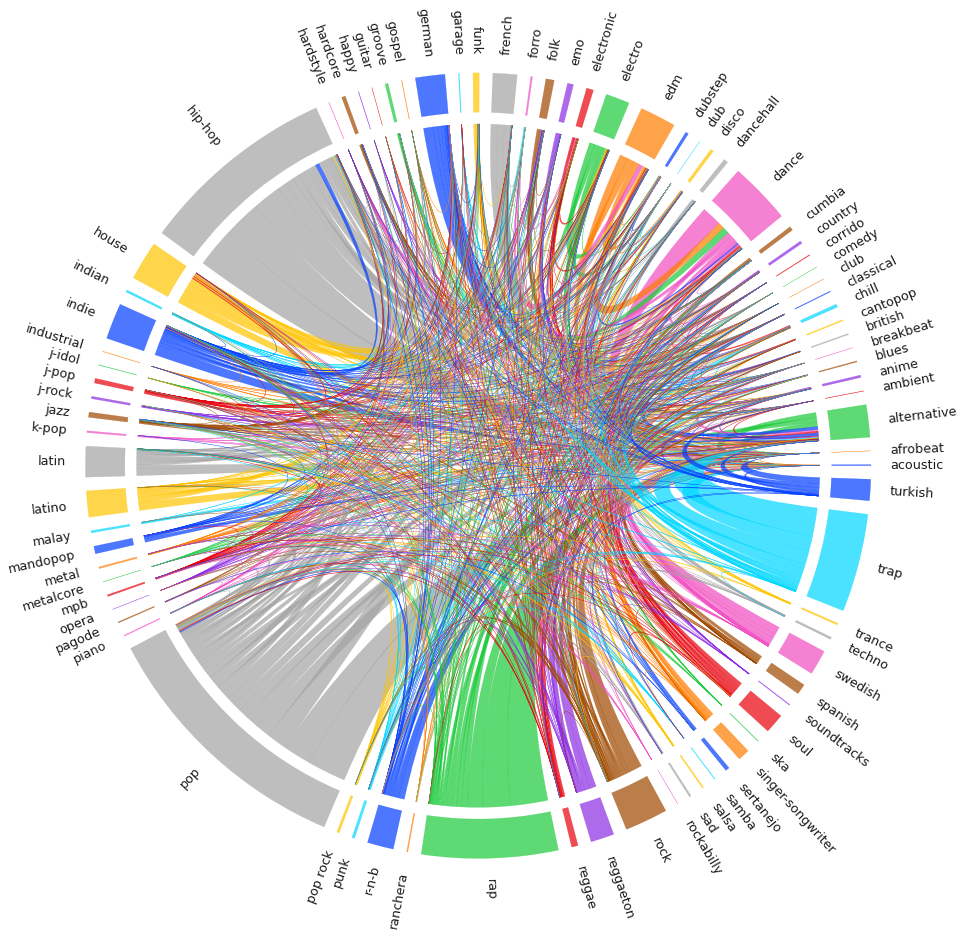

In [144]:
plot_chord(artist_genres_collocation_df)

In [145]:
art_coll_df= keep_largest_value(artist_genres_collocation_df)
art_coll_df

,acoustic,afrobeat,alternative,ambient,anime,blues,breakbeat,british,cantopop,chill,...,singer-songwriter,ska,soul,soundtracks,spanish,swedish,techno,trance,trap,turkish
acoustic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
afrobeat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alternative,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambient,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
anime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swedish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
techno,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
trance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
trap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/fterroso/projects/songs_collaboration_pred/mpl_chord_diagram/chord_diagram.py:313: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


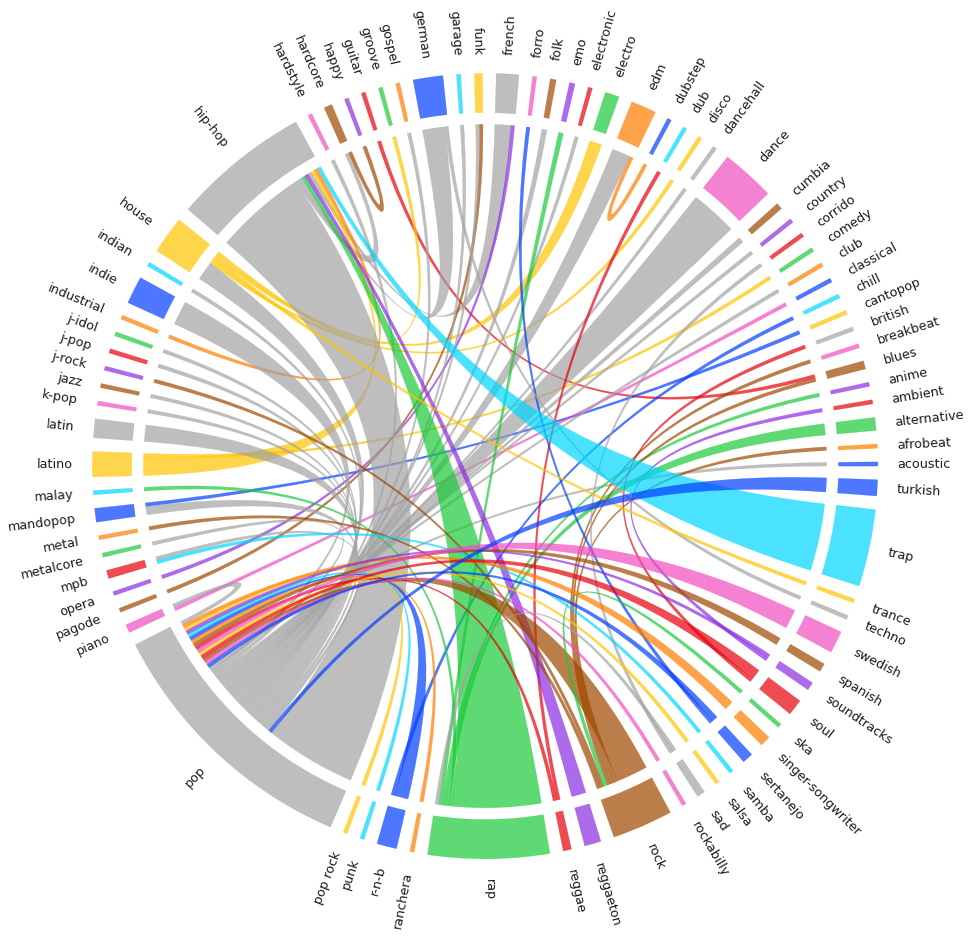

In [146]:
plot_chord(art_coll_df, min_chord_width=50)

### Analyze collocation of genres per collaborative track

In [147]:
collab_w_codes_df

,Artist,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,Artist_7,Artist_8,Artist_9,Artist_10,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_artists
0,no_code,7HSeegdmjLYRJpkOYIaZIW,4SgKWjM7cJDCh2aY9H4HZf,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,0.0,-5.511,0.0,0.0532,0.22900,0.000000,0.0693,0.863,180.143,2
1,1uUuCEXmWpKN2YLl5xSoT2,5wV3FoaNbDB6X9INuQvs1K,0Jsk5iYMr5aNjHury7blm1,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,0.0,-7.339,0.0,0.0412,0.00095,0.000006,0.3650,0.739,155.889,3
2,1uUuCEXmWpKN2YLl5xSoT2,5GvMLzUp6tMBpaCbr903RN,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,11.0,-7.194,0.0,0.2960,0.29100,0.000000,0.3100,0.601,91.709,2
3,1uUuCEXmWpKN2YLl5xSoT2,1PyToLP6F2rzV0ZSR71lgl,5qeFPM2PZUCzcpkY4e4RC8,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,6.0,-5.208,0.0,0.1180,0.06100,0.000003,0.1180,0.474,171.804,3
4,1uUuCEXmWpKN2YLl5xSoT2,no_code,0Jsk5iYMr5aNjHury7blm1,5wV3FoaNbDB6X9INuQvs1K,5eir5zFJpES4j7gsymbVyl,no_code,no_code,no_code,no_code,no_code,...,2.0,-7.416,0.0,0.2340,0.07750,0.000000,0.0918,0.652,129.997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28532,2Sm4rGKWBnOQhdqDy4JJh0,5cMMheSnLhCt0YdwFkp3R9,no_code,267wBt3XfmW3kdOC0JCtcO,no_code,no_code,no_code,no_code,no_code,no_code,...,8.0,-5.209,1.0,0.3240,0.04630,0.000000,0.1770,0.500,93.028,3
28533,3Cs5QQYz6pMhbEKaBNCtfi,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,7.0,-9.271,1.0,0.0445,0.78800,0.000000,0.2670,0.365,128.049,1
28534,3Cs5QQYz6pMhbEKaBNCtfi,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,4.0,-9.274,0.0,0.0529,0.80700,0.000000,0.4280,0.339,128.081,1
28535,no_code,7eLcDZDYHXZCebtQmVFL25,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,2.0,-6.621,1.0,0.1020,0.12200,0.000007,0.0984,0.362,116.041,1


In [148]:
artist_cols=['Artist', 'Artist_2', 'Artist_3', 'Artist_4', 'Artist_5', 'Artist_6',
             'Artist_7', 'Artist_8', 'Artist_9', 'Artist_10', 'Artist_11',
             'Artist_12', 'Artist_13', 'Artist_14', 'Artist_15', 'Artist_16',
             'Artist_17', 'Artist_18', 'Artist_19', 'Artist_20', 'Artist_21',
             'Artist_22', 'Artist_23', 'Artist_24', 'Artist_25', 'Artist_26',
             'Artist_27', 'Artist_28', 'Artist_29', 'Artist_30', 'Artist_31',
             'Artist_32', 'Artist_33', 'Artist_34', 'Artist_35', 'Artist_36',
             'Artist_37', 'Artist_38', 'Artist_39', 'Artist_40']

track_coll_tuples={}
for i, track in tqdm(collab_w_codes_df.iterrows()):
    track_genres=[]
    for c in artist_cols:
        artist_id= track[c]
        if artist_id!= 'no_code':
            artist_genres= final_artist_genres_df.loc[artist_id]['genres']
            artist_cols2= artist_cols.copy()
            artist_cols2.remove(c)
            for c2 in artist_cols2:
                artist_id2= track[c2]
                if artist_id2!= 'no_code':
                    artist_genres2= final_artist_genres_df.loc[artist_id2]['genres']
                    
                    for g in artist_genres:
                        for g2 in artist_genres2:
                            g1_counters= track_coll_tuples.get(g,{})
                            g1g2_val= g1_counters.get(g2,0)+1
                            g1_counters[g2]= g1g2_val
                            track_coll_tuples[g]= g1_counters                  
                            
                            g2_counters= track_coll_tuples.get(g2,{})
                            g2g1_val= g2_counters.get(g,0)+1
                            g2_counters[g]= g2g1_val
                            track_coll_tuples[g2]= g2_counters
                    

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
track_coll_df= pd.DataFrame(track_coll_tuples).fillna(0)
track_coll_df= track_coll_df.sort_index()
track_coll_df

In [ ]:
plot_chord(track_coll_df, min_chord_width=5)

In [ ]:
largest_track_coll_df= keep_largest_value(track_coll_df)
largest_track_coll_df

In [ ]:
plot_chord(largest_track_coll_df, min_chord_width=50)

### Analyze differences between artists and tracks

In [149]:
norm_artist_df= artist_genres_collocation_df.div(artist_genres_collocation_df.sum(axis=1), axis=0)
norm_track_coll_df= track_coll_df.div(track_coll_df.sum(axis=1), axis=0)

In [150]:
norm_artist_df

,rap,pop,hip-hop,trap,german,emo,indie,j-rock,j-pop,anime,...,guitar,afrobeat,club,hardstyle,j-idol,metalcore,gospel,rockabilly,breakbeat,dub
acoustic,0.000000,0.357143,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
afrobeat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
alternative,0.169730,0.158919,0.167568,0.033514,0.025946,0.000000,0.064865,0.004324,0.002162,0.0,...,0.0,0.001081,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
ambient,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
anime,0.369231,0.153846,0.015385,0.000000,0.000000,0.000000,0.000000,0.046154,0.153846,0.0,...,0.0,0.000000,0.0,0.0,0.015385,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swedish,0.114846,0.378151,0.184874,0.183473,0.001401,0.000000,0.012605,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
techno,0.032258,0.080645,0.000000,0.000000,0.193548,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.016129,0.0
trance,0.000000,0.160000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
trap,0.168679,0.167614,0.334517,0.000000,0.033026,0.009233,0.006037,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [151]:
norm_track_coll_df

,cumbia,pop,rap,hip-hop,trap,german,k-pop,emo,indie,singer-songwriter,...,guitar,afrobeat,blues,comedy,garage,happy,ska,rockabilly,metalcore,breakbeat
acoustic,0.000000,0.313131,0.010101,0.010101,0.010101,0.010101,0.010101,0.000000,0.040404,0.060606,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
afrobeat,0.000000,0.090909,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
alternative,0.004985,0.091258,0.122508,0.297929,0.142063,0.065951,0.000383,0.000192,0.024156,0.000575,...,0.0,0.000575,0.000383,0.0,0.000000,0.0,0.001534,0.0,0.0,0.0
ambient,0.000000,0.111111,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
anime,0.000000,0.188976,0.141732,0.023622,0.000000,0.000000,0.007874,0.007874,0.000000,0.031496,...,0.0,0.000000,0.000000,0.0,0.015748,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swedish,0.000000,0.216308,0.127947,0.188881,0.162787,0.013195,0.000297,0.000000,0.003410,0.001038,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
techno,0.000000,0.281879,0.026846,0.060403,0.000000,0.073826,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.006711,0.0,0.000000,0.0,0.0,0.0
trance,0.000000,0.229508,0.010929,0.005464,0.000000,0.027322,0.000000,0.000000,0.005464,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
trap,0.001903,0.100296,0.100314,0.264733,0.229817,0.022076,0.000166,0.002679,0.003972,0.000055,...,0.0,0.000000,0.000055,0.0,0.000000,0.0,0.000074,0.0,0.0,0.0


In [152]:
diff_df= norm_track_coll_df / norm_artist_df
diff_df= diff_df.fillna(0)
diff_df= diff_df.replace([np.inf, -np.inf], 0)
diff_df

,acoustic,afrobeat,alternative,ambient,anime,blues,breakbeat,british,cantopop,chill,...,ska,sleep,soul,soundtracks,spanish,swedish,techno,trance,trap,turkish
acoustic,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
afrobeat,0.0,0.000000,0.545455,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
alternative,0.0,0.532017,0.000000,0.0,0.0,0.177339,0.0,0.0,0.0,0.022167,...,0.472904,0.0,0.436859,0.0,0.413791,0.000000,0.0,0.0,4.238973,0.329344
ambient,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
anime,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swedish,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.152903,0.0,0.000000,0.000000,0.0,0.0,0.887253,0.000000
techno,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
trance,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
trap,0.0,0.000000,1.243515,0.0,0.0,0.000000,0.0,0.0,0.0,0.156069,...,0.000000,0.0,0.203633,0.0,0.398842,0.436039,0.0,0.0,0.000000,0.300403


In [153]:
max_diff_df_weights= diff_df.max(axis=1).to_frame()
max_diff_df_tuples= diff_df.idxmax(axis=1).to_frame()
max_diff_df_tuples['count']=max_diff_df_weights

In [154]:
max_diff_df_tuples= max_diff_df_tuples[max_diff_df_tuples['count']>1]
max_diff_df_tuples

,0,count
acoustic,rock,1.131313
alternative,reggaeton,5.320169
anime,r-n-b,1.791339
blues,pop,1.061972
british,pop,2.264151
...,...,...
swedish,german,9.421201
techno,pop,3.495302
trance,electro,1.821494
trap,cumbia,5.358360


In [155]:
max_diff_df_tuples= max_diff_df_tuples.reset_index()
max_diff_df_tuples= max_diff_df_tuples.rename(columns={'index':'g1', 0:'g2', 'count':'diff'})
max_diff_df_tuples

,g1,g2,diff
0,acoustic,rock,1.131313
1,alternative,reggaeton,5.320169
2,anime,r-n-b,1.791339
3,blues,pop,1.061972
4,british,pop,2.264151
...,...,...,...
66,swedish,german,9.421201
67,techno,pop,3.495302
68,trance,electro,1.821494
69,trap,cumbia,5.358360


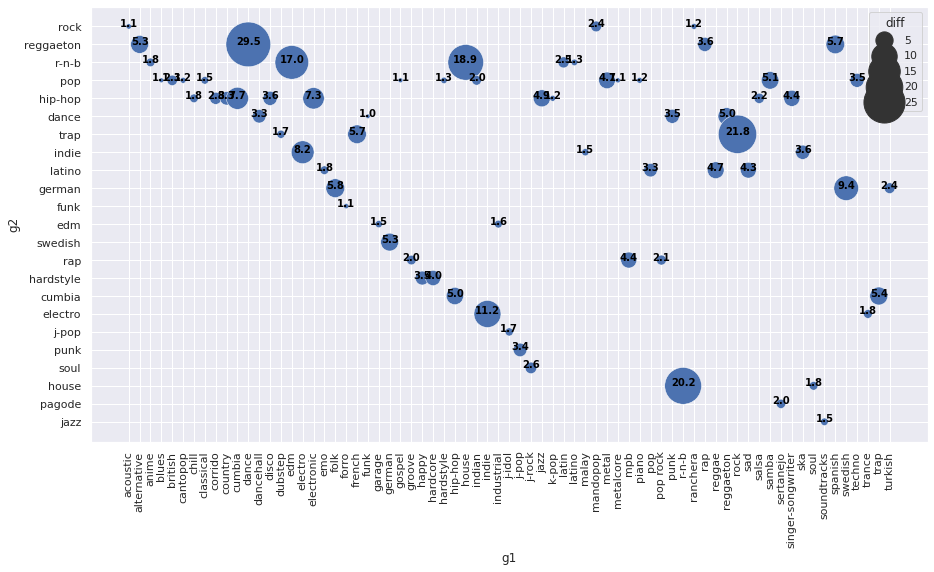

In [156]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.scatterplot(data=max_diff_df_tuples, x="g1", y='g2', size="diff", legend=True, sizes=(20, 2000));

#For each point, we add a text inside the bubble
for i, r in max_diff_df_tuples.iterrows():
    ax.text(r['g1'], r['g2'], round(r['diff'],1), horizontalalignment='center', size='small', color='black', weight='semibold')

plt.xticks(rotation=90);

In [157]:
min_diff_df_weights= diff_df.min(axis=1).to_frame()
min_diff_df_tuples= diff_df.idxmin(axis=1).to_frame()
min_diff_df_tuples['count']=min_diff_df_weights

In [158]:
min_diff_df_tuples

,0,count
acoustic,acoustic,0.0
afrobeat,acoustic,0.0
alternative,acoustic,0.0
ambient,acoustic,0.0
anime,acoustic,0.0
...,...,...
swedish,acoustic,0.0
techno,acoustic,0.0
trance,acoustic,0.0
trap,acoustic,0.0


In [159]:
min_diff_df_tuples.loc['british']

0        acoustic
count         0.0
Name: british, dtype: object

### Calculate entropy between artists genres and collaboration tracks

In [ ]:
norm_track_coll_df

In [ ]:
from scipy.stats import entropy

entropy_track_artist=[]
norm_track_coll_df= norm_track_coll_df[norm_artist_df.columns]
for g in norm_track_coll_df.index:
    try:

        g1_dist= norm_track_coll_df.loc[g].values
        g2_dist= norm_artist_df.loc[g].values

        g1_dist= g1_dist[np.where(g2_dist>0)]
        g2_dist= g2_dist[g2_dist>0]
        e= entropy(g1_dist, g2_dist, base=len(g1_dist))

        if not np.isnan(e):
            entropy_track_artist.append((g,e))
    except:
        print('Error with',g)
entropy_track_artist_df= pd.DataFrame(entropy_track_artist, columns='genre entropy'.split())
entropy_track_artist_df= entropy_track_artist_df.set_index('genre')
entropy_track_artist_df

In [ ]:
entropy_track_artist_df.plot(kind='bar', grid=True, figsize=(15,5),legend=False);
plt.tight_layout()

### Analyze by popularity

In [160]:
artist_popularity_followers_df= pd.read_csv(os.path.join('data','generated','01b_artists_popularity_followers.csv'), index_col=0)
artist_popularity_followers_df.head()

,popularity,followers
artist_id,,
1uUuCEXmWpKN2YLl5xSoT2,64,99222
5wV3FoaNbDB6X9INuQvs1K,65,66069
0Jsk5iYMr5aNjHury7blm1,70,1098313
5GvMLzUp6tMBpaCbr903RN,65,478720
1PyToLP6F2rzV0ZSR71lgl,63,38109


In [161]:
target_cols= ['Artist', 'Artist_2', 'Artist_3', 'Artist_4', 'Artist_5', 'Artist_6',
              'Artist_7', 'Artist_8', 'Artist_9', 'Artist_10', 'Artist_11',
              'Artist_12', 'Artist_13', 'Artist_14', 'Artist_15', 'Artist_16',
              'Artist_17', 'Artist_18', 'Artist_19', 'Artist_20', 'Artist_21',
              'Artist_22', 'Artist_23', 'Artist_24', 'Artist_25', 'Artist_26',
              'Artist_27', 'Artist_28', 'Artist_29', 'Artist_30', 'Artist_31',
              'Artist_32', 'Artist_33', 'Artist_34', 'Artist_35', 'Artist_36',
              'Artist_37', 'Artist_38', 'Artist_39', 'Artist_40']

In [162]:
collab_w_codes_df

,Artist,Artist_2,Artist_3,Artist_4,Artist_5,Artist_6,Artist_7,Artist_8,Artist_9,Artist_10,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_artists
0,no_code,7HSeegdmjLYRJpkOYIaZIW,4SgKWjM7cJDCh2aY9H4HZf,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,0.0,-5.511,0.0,0.0532,0.22900,0.000000,0.0693,0.863,180.143,2
1,1uUuCEXmWpKN2YLl5xSoT2,5wV3FoaNbDB6X9INuQvs1K,0Jsk5iYMr5aNjHury7blm1,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,0.0,-7.339,0.0,0.0412,0.00095,0.000006,0.3650,0.739,155.889,3
2,1uUuCEXmWpKN2YLl5xSoT2,5GvMLzUp6tMBpaCbr903RN,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,11.0,-7.194,0.0,0.2960,0.29100,0.000000,0.3100,0.601,91.709,2
3,1uUuCEXmWpKN2YLl5xSoT2,1PyToLP6F2rzV0ZSR71lgl,5qeFPM2PZUCzcpkY4e4RC8,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,6.0,-5.208,0.0,0.1180,0.06100,0.000003,0.1180,0.474,171.804,3
4,1uUuCEXmWpKN2YLl5xSoT2,no_code,0Jsk5iYMr5aNjHury7blm1,5wV3FoaNbDB6X9INuQvs1K,5eir5zFJpES4j7gsymbVyl,no_code,no_code,no_code,no_code,no_code,...,2.0,-7.416,0.0,0.2340,0.07750,0.000000,0.0918,0.652,129.997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28532,2Sm4rGKWBnOQhdqDy4JJh0,5cMMheSnLhCt0YdwFkp3R9,no_code,267wBt3XfmW3kdOC0JCtcO,no_code,no_code,no_code,no_code,no_code,no_code,...,8.0,-5.209,1.0,0.3240,0.04630,0.000000,0.1770,0.500,93.028,3
28533,3Cs5QQYz6pMhbEKaBNCtfi,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,7.0,-9.271,1.0,0.0445,0.78800,0.000000,0.2670,0.365,128.049,1
28534,3Cs5QQYz6pMhbEKaBNCtfi,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,4.0,-9.274,0.0,0.0529,0.80700,0.000000,0.4280,0.339,128.081,1
28535,no_code,7eLcDZDYHXZCebtQmVFL25,no_code,no_code,no_code,no_code,no_code,no_code,no_code,no_code,...,2.0,-6.621,1.0,0.1020,0.12200,0.000007,0.0984,0.362,116.041,1


In [163]:
pop_collab= {}
for i, song in tqdm(collab_w_codes_df.iterrows()):
    aux_df=song[target_cols]
    song_artists_lst= aux_df[aux_df!='no_code'].values.tolist()
    if len(song_artists_lst) > 1:
        for a1,a2 in list(itertools.combinations(song_artists_lst, 2)):
            p1= artist_popularity_followers_df.loc[a1]['popularity']
            p1= p1- (p1%10)

            p2= artist_popularity_followers_df.loc[a2]['popularity']
            p2= p2 - (p2%10)

            #sorted_ps= np.sort([p1,p2])

            links= pop_collab.get(p1,{})
            n_ocurrences= links.get(p2,0)
            n_ocurrences += 1
            links[p2]= n_ocurrences
            pop_collab[p1]= links
        
            links= pop_collab.get(p2,{})
            n_ocurrences= links.get(p1,0)
            n_ocurrences += 1
            links[p1]= n_ocurrences
            pop_collab[p2]= links
    

0it [00:00, ?it/s]

In [164]:
pop_collab_df= pd.DataFrame(pop_collab)
pop_collab_df= pop_collab_df.fillna(0)
pop_collab_df= pop_collab_df.sort_index()
pop_collab_df = pop_collab_df.reindex(sorted(pop_collab_df.columns), axis=1)
pop_collab_df

,0,10,20,30,40,50,60,70,80,90,100
0,38.0,25.0,46.0,38.0,46,58,30,6,0.0,0.0,1.0
10,25.0,12.0,52.0,125.0,93,53,32,3,3.0,0.0,0.0
20,46.0,52.0,240.0,381.0,426,326,114,24,5.0,1.0,0.0
30,38.0,125.0,381.0,1066.0,1446,1123,526,144,54.0,6.0,0.0
40,46.0,93.0,426.0,1446.0,4158,3542,2102,504,126.0,21.0,1.0
50,58.0,53.0,326.0,1123.0,3542,6024,5026,1744,549.0,82.0,12.0
60,30.0,32.0,114.0,526.0,2102,5026,7284,3632,1139.0,269.0,24.0
70,6.0,3.0,24.0,144.0,504,1744,3632,4810,1972.0,491.0,72.0
80,0.0,3.0,5.0,54.0,126,549,1139,1972,1754.0,619.0,85.0
90,0.0,0.0,1.0,6.0,21,82,269,491,619.0,264.0,8.0


In [165]:
norm_pop_collab_df= pop_collab_df.div(pop_collab_df.sum(axis=1), axis=0)
norm_pop_collab_df

,0,10,20,30,40,50,60,70,80,90,100
0,0.131944,0.086806,0.159722,0.131944,0.159722,0.201389,0.104167,0.020833,0.000000,0.000000,0.003472
10,0.062814,0.030151,0.130653,0.314070,0.233668,0.133166,0.080402,0.007538,0.007538,0.000000,0.000000
20,0.028483,0.032198,0.148607,0.235913,0.263777,0.201858,0.070588,0.014861,0.003096,0.000619,0.000000
30,0.007741,0.025463,0.077613,0.217152,0.294561,0.228763,0.107150,0.029334,0.011000,0.001222,0.000000
40,0.003690,0.007461,0.034176,0.116005,0.333574,0.284156,0.168632,0.040433,0.010108,0.001685,0.000080
50,0.003129,0.002859,0.017585,0.060575,0.191057,0.324937,0.271104,0.094072,0.029613,0.004423,0.000647
60,0.001487,0.001586,0.005650,0.026068,0.104173,0.249083,0.360987,0.179998,0.056448,0.013331,0.001189
70,0.000448,0.000224,0.001791,0.010745,0.037606,0.130130,0.271004,0.358902,0.147142,0.036636,0.005372
80,0.000000,0.000476,0.000793,0.008563,0.019981,0.087060,0.180622,0.312718,0.278148,0.098160,0.013479
90,0.000000,0.000000,0.000568,0.003407,0.011925,0.046564,0.152754,0.278819,0.351505,0.149915,0.004543


In [166]:
df=norm_pop_collab_df.unstack().to_frame().reset_index()
df

,level_0,level_1,0
0,0,0,0.131944
1,0,10,0.062814
2,0,20,0.028483
3,0,30,0.007741
4,0,40,0.003690
...,...,...,...
116,100,60,0.001189
117,100,70,0.005372
118,100,80,0.013479
119,100,90,0.004543


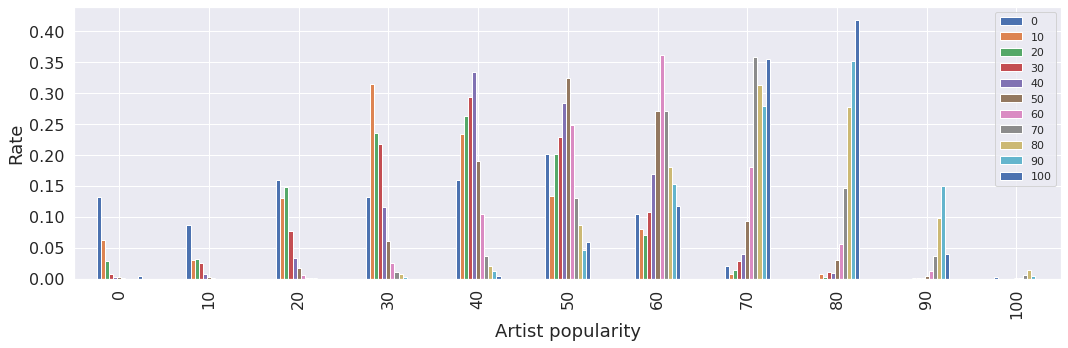

In [170]:
ax=norm_pop_collab_df.T.plot(kind='bar', figsize=(15,5), fontsize=16);
ax.set_xlabel('Artist popularity', fontsize=18)
ax.set_ylabel('Rate', fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join('figs', '03_popularity_distribution.png'), bbox_inches='tight')

### Sample code

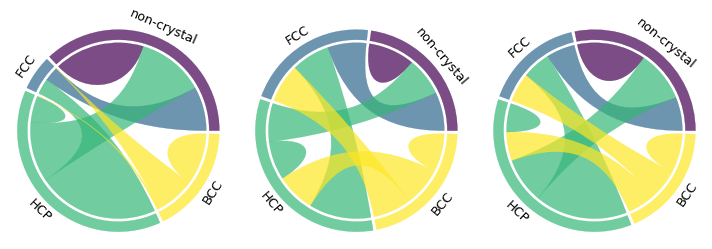

In [60]:
import numpy as np
names = ['non-crystal', 'FCC', 'HCP', 'BCC']

flux = np.array([
    [11975,  5871,  8916,     0],
    [ 1951,     0,  2060,     0],
    [ 8010, 16145,  3504,     0],
    [    0,  5200,   300,  6907]
])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

chord_diagram(flux, names, ax=ax1)
chord_diagram(flux, names, ax=ax2, min_chord_width=10000)
chord_diagram(flux, names, ax=ax3, min_chord_width=5000)

plt.show()

In [61]:
print("That's all folks!")

That's all folks!
